In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

In [3]:
df = pd.read_csv('spam-email-dataset.csv',encoding='latin')

# Exploring the data

In [4]:
df.shape

(5572, 5)

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1259,ham,We have sent JD for Customer Service cum Accou...,NaN,NaN,NaN
4551,ham,"\SYMPTOMS\"" when U are in love: \""1.U like lis...",NaN,NaN,NaN
2871,ham,See you there!,NaN,NaN,NaN
1021,spam,Guess what! Somebody you know secretly fancies...,NaN,NaN,NaN
3596,spam,Congratulations YOU'VE Won. You're a Winner in...,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# 1. Data Cleaning

In [7]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2282,ham,Whom you waited for yesterday
472,ham,Nothing. I meant that once the money enters yo...
5381,spam,You have 1 new message. Call 0207-083-6089
2737,ham,Hi Chachi tried calling u now unable to reach ...
5024,ham,I was gonna ask you lol but i think its at 7


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
1732,ham,"K, can that happen tonight?"
2484,ham,Only if you promise your getting out as SOON a...
409,ham,Message:some text missing* Sender:Name Missing...
392,ham,Morning only i can ok.
4555,ham,Gettin rdy to ship comp


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# Label encoding the target column
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Check for missing values
df.isnull().sum()

,0
target,0
text,0


In [15]:
# Check for duplicate values
df.duplicated().sum()

np.int64(403)

In [16]:
# Remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

# 2. Exploratory Data Analysis (EDA)

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

,count
target,
0,4516
1,653


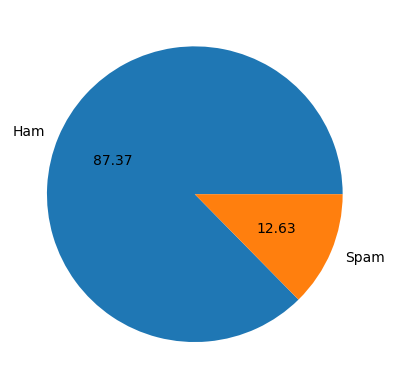

In [21]:
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

> **Data is imbalanced**

## Adding new features for number of characters, words and sentences

In [22]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Number of characters
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# Number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# Number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
# For whole dataset
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Just for ham messages
df[df['target']==0] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Just for spam messages
df[df['target']==1] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

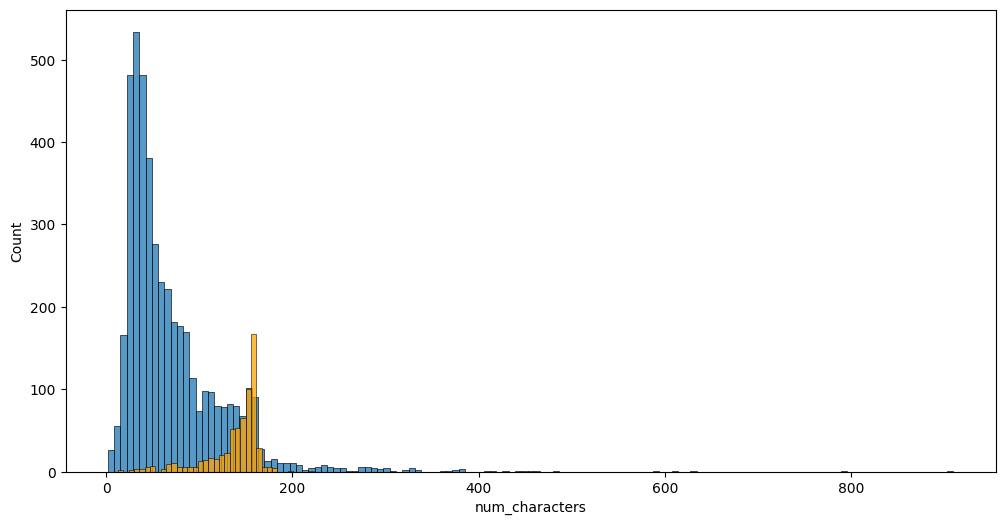

In [32]:
# For characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='orange')

<Axes: xlabel='num_words', ylabel='Count'>

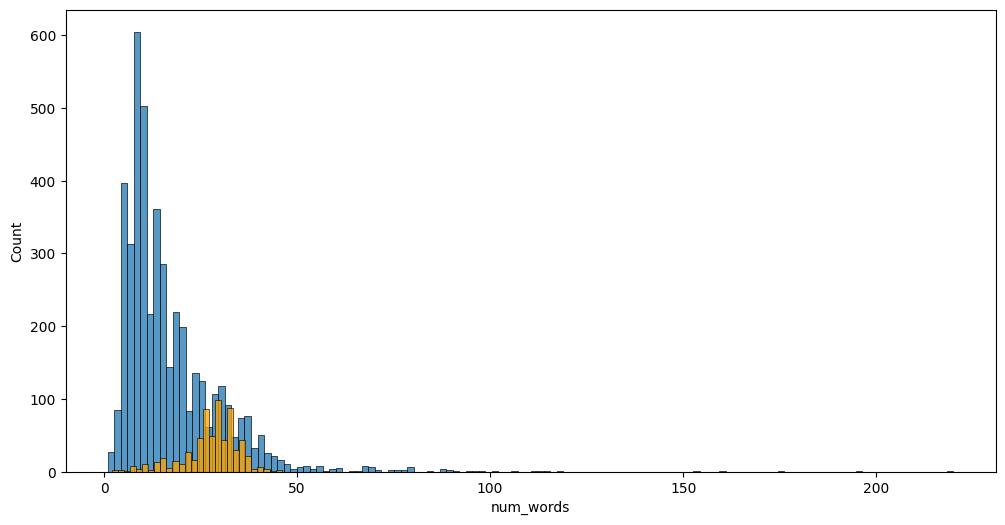

In [33]:
# For words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='orange')

<Axes: xlabel='num_sentences', ylabel='Count'>

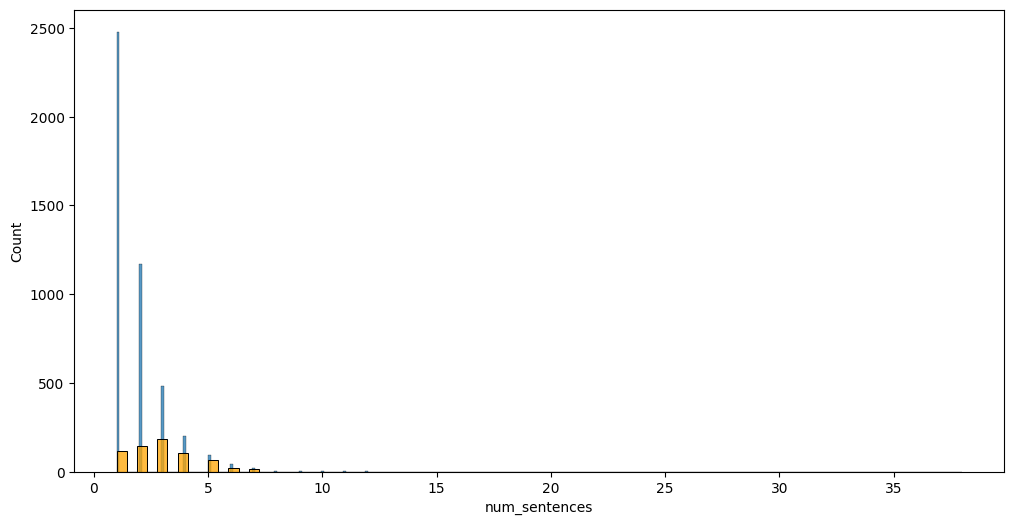

In [34]:
# For sentences
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='orange')

> **We can infer from the above analysis that spam messages have a higher characters/word/sentences count on an average.**

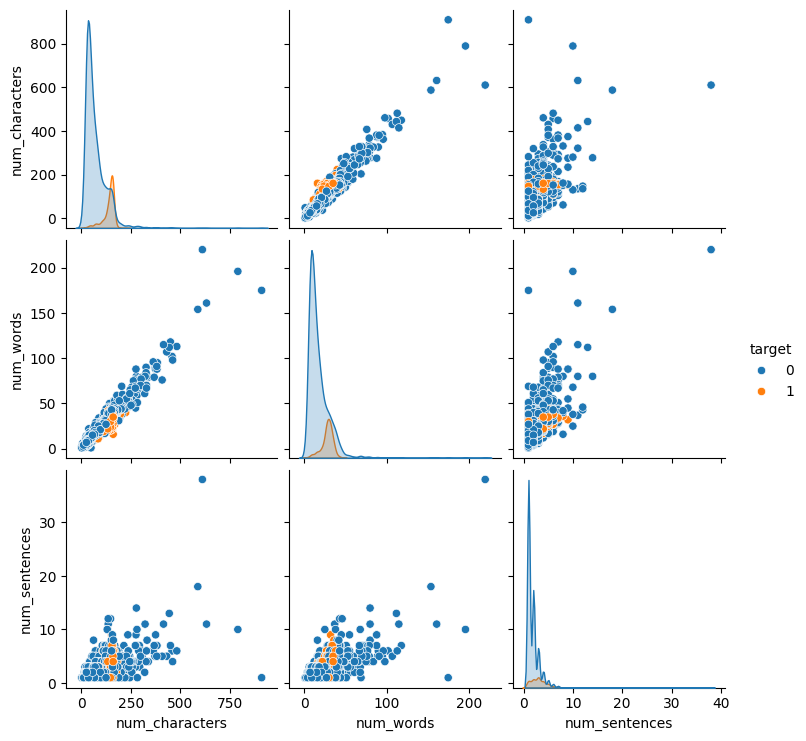

In [35]:
sns.pairplot(df,hue='target')

In [36]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

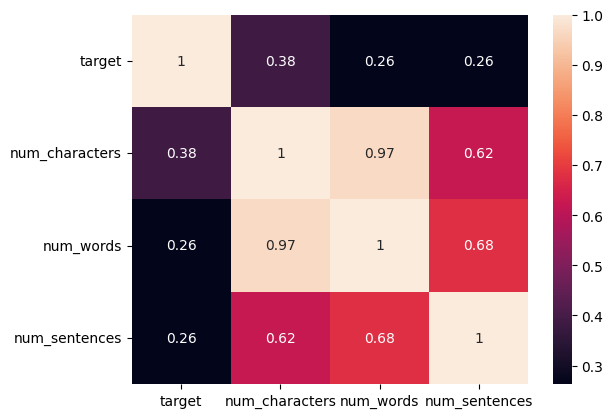

In [37]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

> - **We can only pick one column among 'num_characters', 'num_words' and 'num_sentences' due to high correlation between them (multicollinearity).**
> - **We will pick 'num_characters' column since it has the highest correlation with the target column.**
> - **Though it might not be helpful in improving the model performance due to the imbalance in the dataset.**

#

In [38]:
import re
import string
from scipy import sparse
from scipy.sparse import hstack

# Helper functions to extract numeric features that capture spam-like structure (e.g., URLs, digits, punctuation, uppercase text, phone numbers, specific keywords).

def has_url(text):
    return int(bool(re.search(r'http[s]?://|www\.|bit\.ly|tinyurl', str(text), re.IGNORECASE)))

def count_digits(text):
    return sum(c.isdigit() for c in str(text))

def exclamation_count(text):
    return str(text).count('!')

def uppercase_ratio(text):
    s = str(text)
    letters = [c for c in s if c.isalpha()]
    if not letters:
        return 0.0
    upp = sum(1 for c in letters if c.isupper())
    return upp / len(letters)

def has_phone_number(text):
    # This is a basic pattern, more complex patterns might be needed for full coverage
    return int(bool(re.search(r'\d{3}[-.\s]?\d{3}[-.\s]?\d{4}', str(text))))

def punctuation_count(text):
    return sum(1 for c in str(text) if c in string.punctuation)

def contains_keyword_group_1(text):
    keywords = ['action required', 'important', 'account', 'payment', 'security', 'alert', 'verify', 'confirm']
    text_lower = str(text).lower()
    return int(any(keyword in text_lower for keyword in keywords))

def contains_keyword_group_2(text):
    keywords = ['free', 'win', 'prize', 'claim', 'urgent', 'limited time', 'guarantee']
    text_lower = str(text).lower()
    return int(any(keyword in text_lower for keyword in keywords))

def contains_high_urgency_words(text):
    keywords = ['alert', 'suspension', 'frozen', 'dispute', 'deleted', 're-activate', 'action required']
    text_lower = str(text).lower()
    return int(any(keyword in text_lower for keyword in keywords))

def contains_financial_terms(text):
    keywords = ['credit card', 'payment', 'dispute', 'subscription', 'fee', 'balance']
    text_lower = str(text).lower()
    return int(any(keyword in text_lower for keyword in keywords))

def contains_technical_jargon(text):
    keywords = ['device', 'log in', 'unauthorized', 'data', 'cloud storage']
    text_lower = str(text).lower()
    return int(any(keyword in text_lower for keyword in keywords))

In [39]:
# Compute numeric features from the ORIGINAL text
df['has_url'] = df['text'].apply(has_url)
df['num_digits'] = df['text'].apply(count_digits)
df['exclam_count'] = df['text'].apply(exclamation_count)
df['upper_ratio'] = df['text'].apply(uppercase_ratio)
df['has_phone_number'] = df['text'].apply(has_phone_number)
df['punctuation_count'] = df['text'].apply(punctuation_count)
df['keyword_group_1'] = df['text'].apply(contains_keyword_group_1)
df['keyword_group_2'] = df['text'].apply(contains_keyword_group_2)
df['feat_high_urgency_words'] = df['text'].apply(contains_high_urgency_words)
df['feat_financial_terms'] = df['text'].apply(contains_financial_terms)
df['feat_technical_jargon'] = df['text'].apply(contains_technical_jargon)

In [40]:
df[['text','has_url','num_digits','exclam_count','upper_ratio','target']].sample(10)

,text,has_url,num_digits,exclam_count,upper_ratio,target
5259,Can help u swoop by picking u up from wherever...,0,0,0,0.015625,0
3893,Dear Dave this is your final notice to collect...,0,24,1,0.190000,1
3293,Beautiful tomorrow never comes.. When it comes...,0,0,0,0.201681,0
1622,U have a secret admirer who is looking 2 make ...,0,12,0,0.053191,1
2488,Aiyah e rain like quite big leh. If drizzling ...,0,0,0,0.037037,0
3292,A little. Meds say take once every 8 hours. It...,0,2,0,0.085366,0
1419,\Speak only when you feel your words are bette...,0,0,0,0.033898,0
164,BangBabes Ur order is on the way. U SHOULD rec...,0,1,0,0.168067,1
3472,You getting back any time soon?,0,0,0,0.040000,0
3730,Isn't frnd a necesity in life? imagine urself ...,0,1,0,0.064516,0


# 3. Data Preprocessing
> *Text Preprocessing* for the textual data in this case

1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [41]:
# For punctuation
import string

In [42]:
# For stop words
from nltk.corpus import stopwords

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
# Function to perform the text processing
def clean_text(text):
    # 1. Lower case
    text = text.lower()

    # 2. Tokenization
    text = nltk.word_tokenize(text)

    # 3.Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    # 4.Removing stopwords and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # 5. Stemming
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

In [45]:
clean_text('How dancing the stage , f8. <,.. are you. still %20%%-=- JOHNNY?')

'danc stage f8 still 20 johnni'

In [46]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [47]:
df[df['target']==1][['text','num_characters','num_words','num_sentences']].sample(10)

,text,num_characters,num_words,num_sentences
730,Email AlertFrom: Jeri StewartSize: 2KBSubject:...,101,16,1
1216,You have 1 new voicemail. Please call 08719181...,50,10,2
2589,Join the UK's horniest Dogging service and u c...,153,32,4
2908,URGENT! Your Mobile number has been awarded wi...,137,26,5
3187,This is the 2nd time we have tried 2 contact u...,153,34,4
712,08714712388 between 10am-7pm Cost 10p,37,5,1
1733,"Hi, this is Mandy Sullivan calling from HOTMIX...",224,40,1
1914,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...,158,32,3
1929,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...,142,30,2
3423,Am new 2 club & dont fink we met yet Will B gr...,161,30,1


### Creating wordclouds for spam and ham

In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
# For spam messages
spam_wc = wc.generate(df[df['target']==1]['cleaned_text'].str.cat(sep=' '))

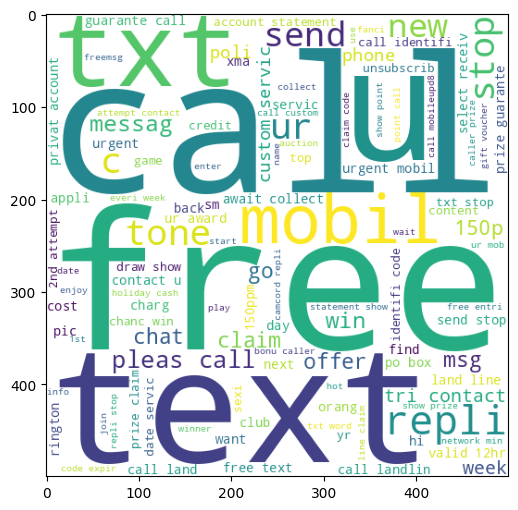

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
# For ham messages
ham_wc = wc.generate(df[df['target']==0]['cleaned_text'].str.cat(sep=' '))

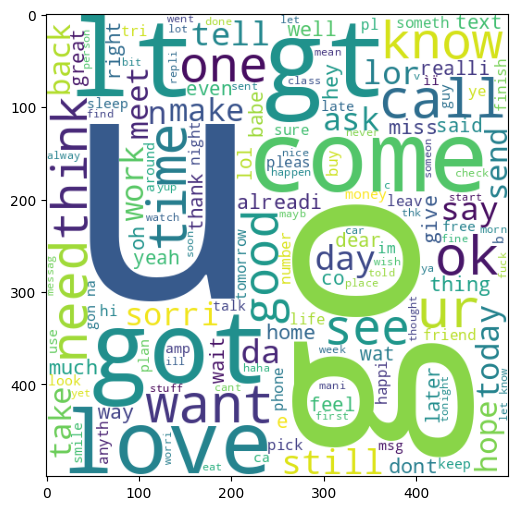

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

### Top 30 words in spam and ham

In [53]:
# For spam messages
spam_corpus = []
for message in df[df['target']==1]['cleaned_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

In [55]:
from collections import Counter

In [56]:
Counter(spam_corpus).most_common(30) # Counter will create a dictionary of every word in spam_corpus with its frequency and most_common will give the top 30 words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

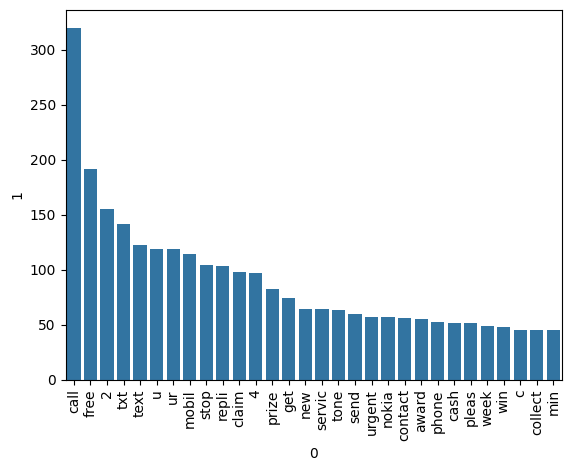

In [57]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
# For ham messages
ham_corpus = []
for message in df[df['target']==0]['cleaned_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35404

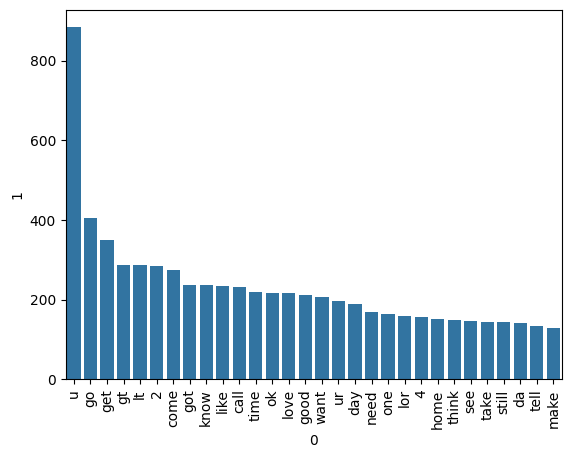

In [60]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
# Vectorize cleaned text
X_text = tfidf.fit_transform(df['cleaned_text']).toarray()

In [63]:
# Convert numeric features to sparse matrix
from scipy.sparse import hstack, csr_matrix
X_num_sparse = csr_matrix(df[['has_url','num_digits','exclam_count','upper_ratio', 'num_words', 'has_phone_number', 'punctuation_count', 'keyword_group_1', 'keyword_group_2', 'feat_high_urgency_words', 'feat_financial_terms', 'feat_technical_jargon']].values)

In [64]:
# Combine both types of features
X = hstack([X_text, X_num_sparse])

In [65]:
y = df['target'].values

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [68]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [69]:
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [70]:
print("Train distribution (before):")
print(pd.Series(y_train).value_counts())
print("Train distribution (after oversampling):")
print(pd.Series(y_train_res).value_counts())

Train distribution (before):
0    3613
1     522
Name: count, dtype: int64
Train distribution (after oversampling):
0    3613
1    3613
Name: count, dtype: int64


In [71]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB(alpha=0.1)
bnb = BernoulliNB()
cnb = ComplementNB(alpha=0.1)

In [73]:
# 1. For GaussianNB
gnb.fit(X_train_res.toarray(),y_train_res)
y_pred1 = gnb.predict(X_test.toarray())
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[784 119]
 [ 25 106]]
0.4711111111111111


In [74]:
# 2. For MultinomialNB
mnb.fit(X_train_res,y_train_res)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9825918762088974
[[896   7]
 [ 11 120]]
0.9448818897637795


In [75]:
# 3. For BernoulliNB
bnb.fit(X_train_res,y_train_res)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9893617021276596
[[903   0]
 [ 11 120]]
1.0


In [76]:

# 4. For ComplementNB
cnb.fit(X_train_res,y_train_res)
y_pred3 = cnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[896   7]
 [ 11 120]]
0.9448818897637795


#### Observations
- After further experimentation and tuning, the BernoulliNB model with `alpha=0.5` achieved the best overall performance, particularly a perfect precision score of 100% on the test set.
- Since this is an imbalanced dataset, precision score is a crucial and reliable measure for minimizing false positives. The BernoulliNB model's perfect precision means it did not incorrectly classify any legitimate messages as spam.

> **Final Selection:** `TfidfVectorizer` -> `BernoulliNB`

In [77]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))